## **IMPORTING LIBRARY**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential  # Corrected import
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input  # Corrected import
from sklearn.metrics import mean_squared_error
import yfinance as yf
import matplotlib.dates as mdates

In [9]:
start_date = "2018-01-01"
end_date ="2024-12-27"  

data = yf.Ticker("BTC-USD")
data = data.history (start=start_date,end=end_date)
del data["Dividends"]
del data ["Stock Splits"]
forecastData = data.copy()
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2024-12-22 00:00:00+00:00,97218.320312,97360.265625,94202.187500,95104.937500,43147981314
2024-12-23 00:00:00+00:00,95099.390625,96416.210938,92403.132812,94686.242188,65239002919
2024-12-24 00:00:00+00:00,94684.343750,99404.062500,93448.015625,98676.093750,47114953674
2024-12-25 00:00:00+00:00,98675.914062,99478.750000,97593.468750,99299.195312,33700394629
2024-12-26 00:00:00+00:00,99297.695312,99884.570312,95137.882812,95795.515625,47054980873


## **CLOSE PRICE VISUALIZATIONS**

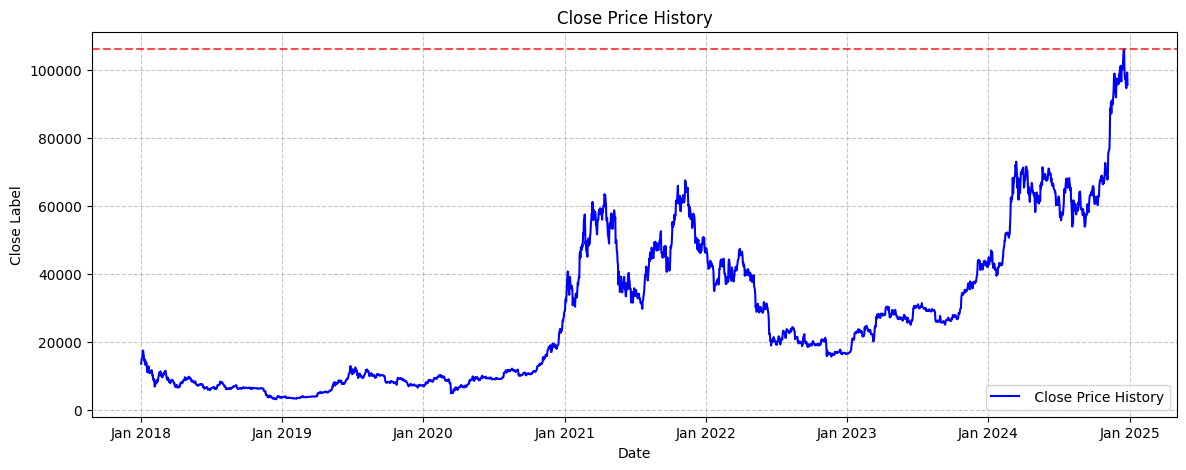

In [12]:
plt.figure(figsize=(14,5))
sns.lineplot(data = data, x=data.index,y='Close',label = ' Close Price History',markers='o',color ='blue')

max_price = data['Close'].max()
max_price_date = data['Close'].idxmax()

plt.annotate(f'{max_price :.2f}',xy={max_price_date,max_price},
             xytext={max_price_date,max_price + 2},
             fontsize = 12,color='red')

plt.axhline(max_price,linestyle='--',color='red',alpha=0.7)
plt.title("Close Price History")
plt.xlabel("Date")
plt.ylabel("Close Label")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid(True,linestyle ='--',alpha = 0.7)
plt.legend()
plt.show()

## **PREPROCESSING**

In [13]:
scaler =MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [14]:
scaled_data

array([[0.10126384],
       [0.11413897],
       [0.1162662 ],
       ...,
       [0.92746133],
       [0.93351651],
       [0.89946842]])

In [16]:
def create_sequence(data,sequence_length):
  sequences =[]
  labels =[]
  for i in range(len(data)-sequence_length):
    sequences.append(data[i:i + sequence_length])
    labels.append(data[i+sequence_length,0])
  return np.array(sequences),np.array(labels)

In [17]:
sequence_length =  60

train_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

X_train,y_train = create_sequence(train_data,sequence_length)
X_test,y_test = create_sequence(test_data,sequence_length)

## **TRAINING DATA(LSTM**)

In [ ]:
model = Sequential()

#First Layer LSTM
model.add(Input(shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

#Second Layer LSTM
model.add(LSTM(units = 50,return_sequences=False))
model.add(Dropout(0.2))

#Dense Layer
model.add(Dense(units=25))
model.add(Dense(units = 1))

In [20]:
model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(X_train,y_train,epochs = 70,batch_size=84,validation_data=(X_test,y_test))

Epoch 1/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - loss: 0.0127 - val_loss: 0.0025
Epoch 2/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 3/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 4/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 9.2504e-04 - val_loss: 0.0018
Epoch 5/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 9.1783e-04 - val_loss: 0.0015
Epoch 6/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 8.0195e-04 - val_loss: 0.0026
Epoch 7/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - loss: 7.9369e-04 - val_loss: 0.0013
Epoch 8/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - loss: 8.2307e-04 - val_loss: 0.0016
Epoch 9/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 7.2472e-04 - val_loss: 0.0016
Epoch 10/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 6.8569e-04 - val_loss: 0.0022
Epoch 11/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 6.3851e-04 - val_loss: 0.0012
Epoch 12/70
24/24 ━

In [21]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))
mse = mean_squared_error(y_test_scaled,predictions)
print(f"Mean Squared Error:{mse}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step
Mean Squared Error:8853856.795496719


## **PREDICTION PRICE VS ACTUAL PRICE**

In [24]:
# Assuming 'data' is your DataFrame and 'sequence_length' is defined
last_30_days = data['Close'][-sequence_length:].values.reshape(-1, 1)
last_30_days_scaled = scaler.transform(last_30_days)  # Corrected 'sclaer' to 'scaler'

# Prepare the input for prediction
X_predict = []
X_predict.append(last_30_days_scaled)

X_predict = np.array(X_predict)
X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))  # Corrected dimension

# Make the prediction
predicted_price = model.predict(X_predict)
predicted_price = scaler.inverse_transform(predicted_price)

# Print the predicted price
print(f"Predicted Bitcoin Price: {predicted_price[0][0]}")  # Removed extra parenthesis

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted Bitcoin Price: 92825.0234375


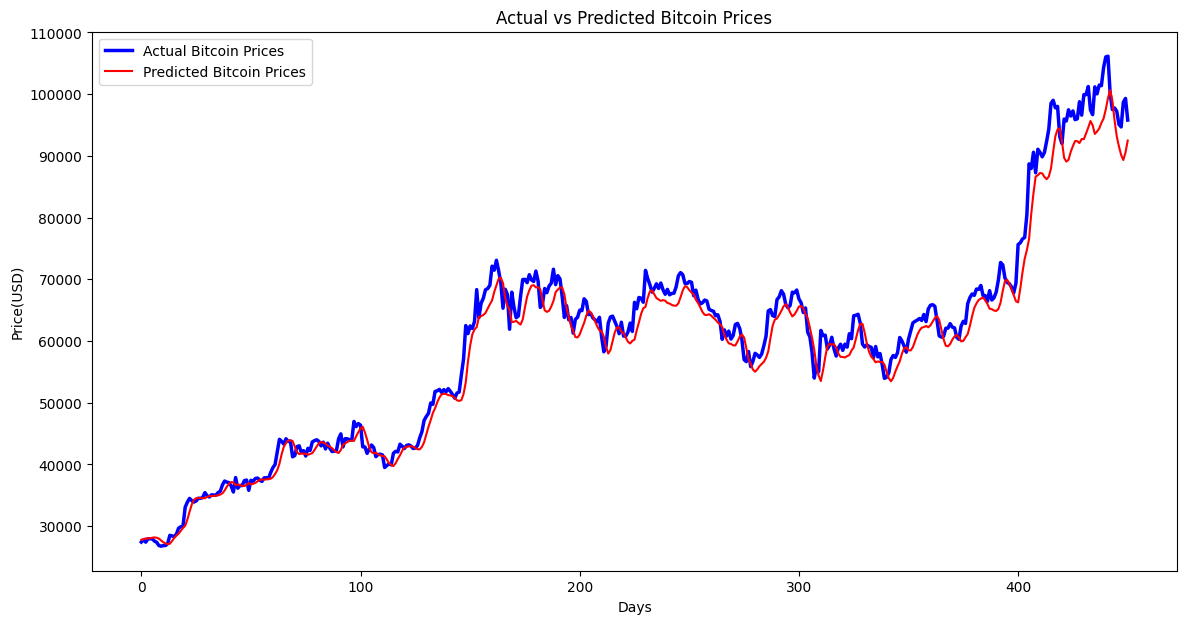

In [25]:
plt.figure(figsize=(14,7))

plt.plot(y_test_scaled,label='Actual Bitcoin Prices',color='blue',linewidth =2.5)
plt.plot(predictions,label='Predicted Bitcoin Prices',color='red',linewidth =1.5)

plt.title('Actual vs Predicted Bitcoin Prices')
plt.xlabel('Days')
plt.ylabel('Price(USD)')
plt.legend()

plt.show()

## **PREDICTION FUTURE PRICE 1 MONTH**

In [33]:
# Assuming 'data' is your DataFrame and 'scaler' is defined
future_days = 60

# Get the last 60 days of data
last_60_days = data['Close'][-sequence_length:].values.reshape(-1, 1)
last_60_days_scaled = scaler.transform(last_60_days)
future_predictions = []

for i in range(future_days):
    X_predict = []
    X_predict.append(last_60_days_scaled)  # Corrected variable name
    X_predict = np.array(X_predict)
    X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))

    # Make the prediction
    predicted_price = model.predict(X_predict)
    predicted_price_unscaled = scaler.inverse_transform(predicted_price)

    future_predictions.append(predicted_price_unscaled[0, 0])

    # Update the last 60 days scaled data
    new_scaled_data = np.append(last_60_days_scaled[1:], predicted_price, axis=0)
    last_60_days_scaled = new_scaled_data.reshape(-1, 1)

# Generate future dates
future_dates = pd.date_range(start=data.index[-1], periods=future_days + 1, freq="D")[1:]

# Create a DataFrame for future predictions
future_predictions_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted Price'])

# Display the future predictions
print(future_predictions_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━

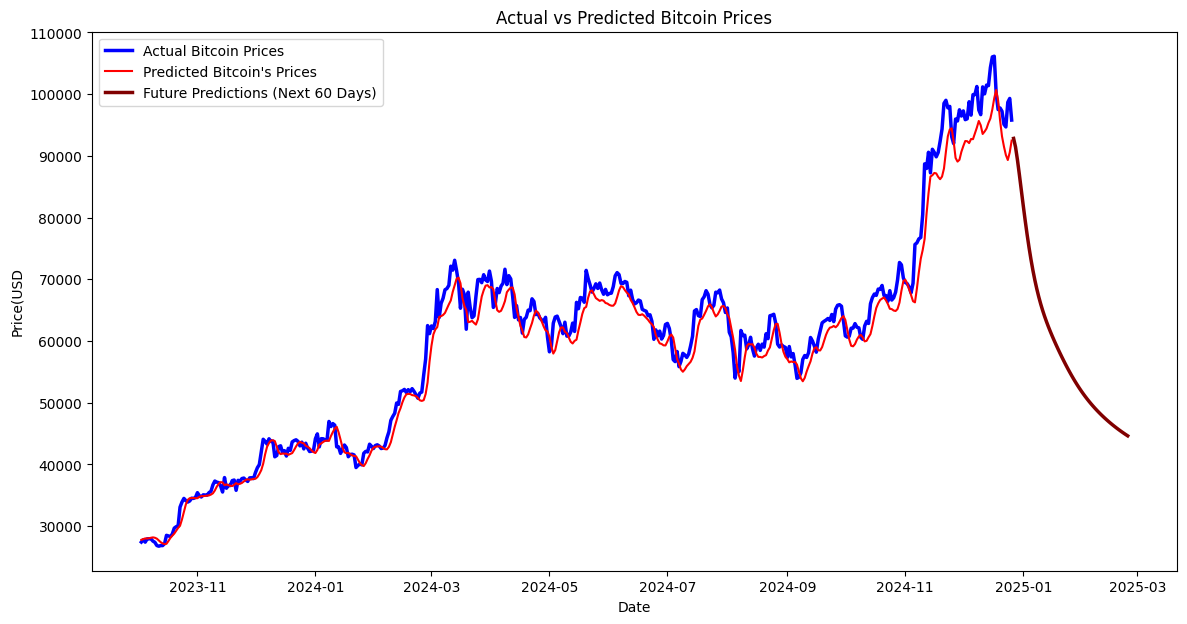

In [35]:
plt.figure(figsize=(14,7))

plt.plot(data.index[-len(y_test_scaled):],y_test_scaled,label="Actual Bitcoin Prices",color='blue',linewidth=2.5)
plt.plot(data.index[-len(y_test_scaled):],predictions,label="Predicted Bitcoin's Prices",color='red',linewidth =1.5)
plt.plot(future_dates,future_predictions,label="Future Predictions (Next 60 Days)",color='maroon',linewidth =2.5)

plt.title("Actual vs Predicted Bitcoin Prices")
plt.xlabel("Date")
plt.ylabel("Price(USD")
plt.legend()

plt.show()